In [32]:
import pandas as pd
import matplotlib.pyplot as plt
#allows me to make the nice chart in output
from IPython.display import display
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import Polygon, MultiPolygon, Point
import numpy as np
#data is in DatafourtoFive

df = pd.read_csv("/Users/joshuahernandez/Documents/GitHub/HeliosProjectDS/Solar_flare_RHESSI_2004_05.csv")
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['x.pos.asec'],df['y.pos.asec']))

gdf.loc[gdf['year'] == 2005, 'month'] +=12

# Set the batch parameters
batchMaxSize = 4
overlap = 2

# Get the maximum value of the 'month' column
max_month = gdf['month'].max()

# Create an array to store the batches of GeoDataFrames
geodataframes = []


# Go through the data and create batches
for start_month in range(1, max_month - batchMaxSize + 2, batchMaxSize - overlap):
    end_month = start_month + batchMaxSize - 1
    # Create a batch within the specified 'start_month' and 'end_month' range
    batch = gdf[(gdf['month'] >= start_month) & (gdf['month'] <= end_month)]
    geodataframes.append(batch)

# #UNCOMMENT TO SEE ALL THE DATA FRAMES
# for idx, batch in enumerate(geodataframes):
#     display(batch)
# print(len(geodataframes))

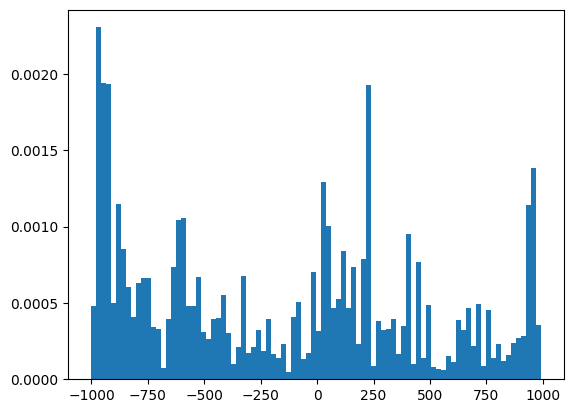

In [33]:
#first batch
currentbranch = geodataframes[0]
#method1
xFirstchart= currentbranch['x.pos.asec']
yFirstchart= currentbranch['total.counts']

histMethod1x = plt.hist(xFirstchart, bins=90, weights=yFirstchart, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.


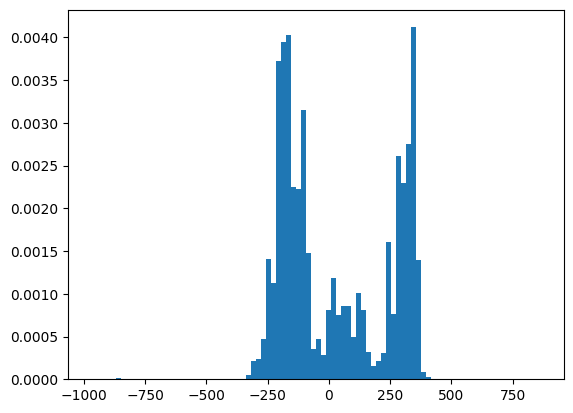

In [34]:
#method 1 batch 1
xsecondChart= currentbranch['y.pos.asec']
ysecondCHart= currentbranch['total.counts']
histMethod1y = plt.hist(xsecondChart, bins=90, weights=ysecondCHart, density=True)

In [35]:
#method 2
x= currentbranch['x.pos.asec']
y= currentbranch['total.counts']


currentbranch['result'] = currentbranch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)

#create new data frame
data = currentbranch['energy.kev']
df = pd.DataFrame(data)

# Parse the values and split first num and second num
df[['start', 'end']] = currentbranch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numbers
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
currentbranch['median'] = df[['start', 'end']].median(axis=1)

currentbranch['result'] = currentbranch["median"]*currentbranch["duration.s"]

# display(currentbranch)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


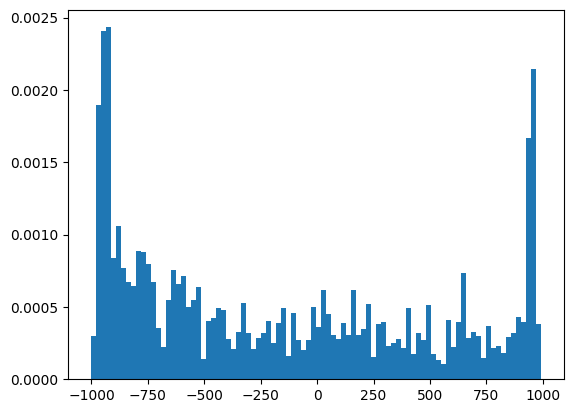

In [36]:
#method 2 for task3
x_2= currentbranch['x.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

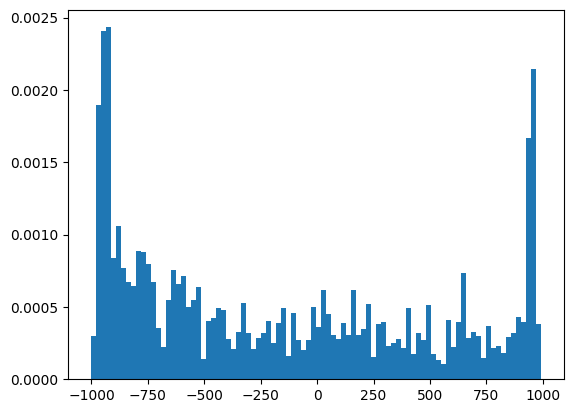

In [37]:
#method 2 for task3
x_2= currentbranch['x.pos.asec']
y_2= currentbranch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)

# Now 'hist' will have y-values based on the 'total.counts' column, and x-values based on the 'x.pos.asec' column.

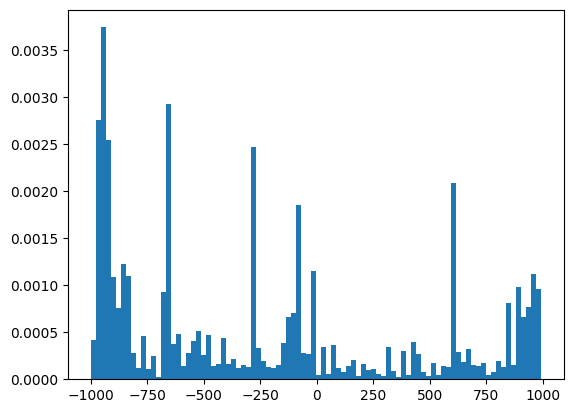

In [38]:
#method1 for task4
lastbatch = geodataframes[10]
x_lastbatch= lastbatch['x.pos.asec']
y_lastbatch= lastbatch['total.counts']

hist = plt.hist(x_lastbatch, bins=90, weights=y_lastbatch, density=True)


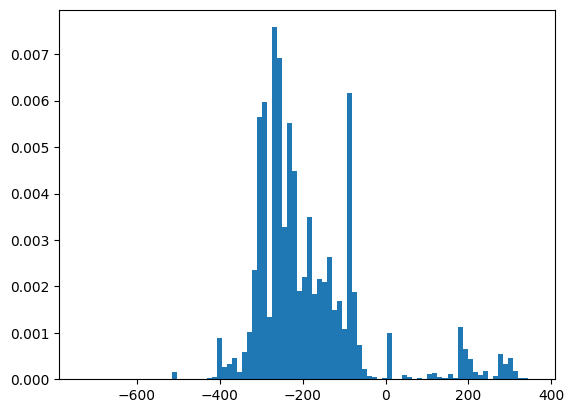

In [39]:
#method1 for task4
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['total.counts']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

In [40]:
#method2 for task4
x= lastbatch['x.pos.asec']
y= lastbatch['total.counts']

# Assuming currentbranch is your DataFrame
lastbatch['result'] = lastbatch.apply(lambda row: row['energy.kev'] * row['duration.s'], axis=1)
# display(currentbranch)

# hist = plt.hist(x, bins=90, weights=y, density=True)

# Create a DataFrame (you should have your DataFrame loaded)
data = lastbatch['energy.kev']
df = pd.DataFrame(data)

# Parse the values from the 'column_name' using a hyphen as a separator
df[['start', 'end']] = lastbatch['energy.kev'].str.split('-', expand=True)

# Convert 'start' and 'end' columns to numeric
df['start'] = pd.to_numeric(df['start'])
df['end'] = pd.to_numeric(df['end'])

# Calculate the median for each row and store it in a new column 'result'
lastbatch['median'] = df[['start', 'end']].median(axis=1)
# The 'start' and 'end' columns now contain the parsed values
# display(currentbranch)


lastbatch['result'] = lastbatch["median"]*lastbatch["duration.s"]

# display(lastbatch)



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


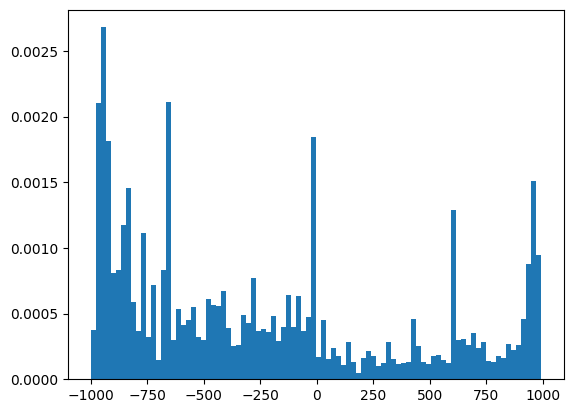

In [41]:
#method 2 for task4 lastbatch
x_2= lastbatch['x.pos.asec']
y_2= lastbatch['result']

hist2 = plt.hist(x_2, bins=90, weights=y_2, density=True)


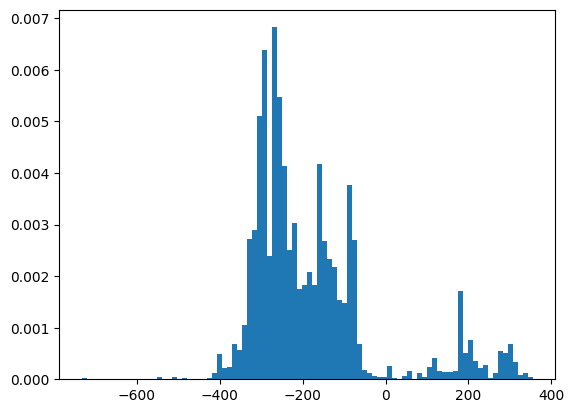

In [42]:
#method 2 for task4 lastbatch
x_l= lastbatch['y.pos.asec']
y_l= lastbatch['result']

hist = plt.hist(x_l, bins=90, weights=y_l, density=True)

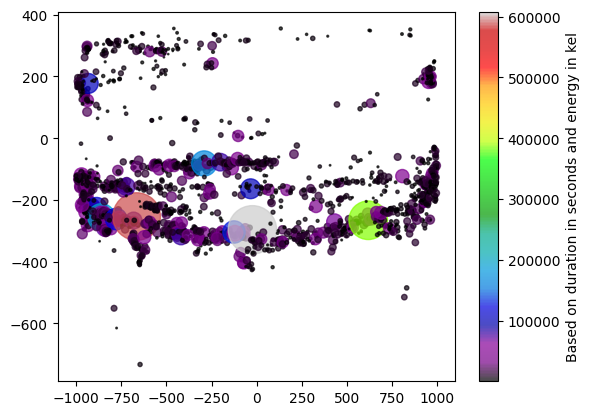

In [43]:
#intensity map
x_list=lastbatch['x.pos.asec']
y_list=lastbatch['y.pos.asec']
z_list=lastbatch['result']

colors= z_list

cmap=plt.get_cmap('nipy_spectral')
sizes=z_list*0.002


plt.scatter(x_list,y_list,c=colors,s=sizes,cmap=cmap, alpha=0.7)
cbar = plt.colorbar()
cbar.set_label('Based on duration in seconds and energy in kel')
plt.show()



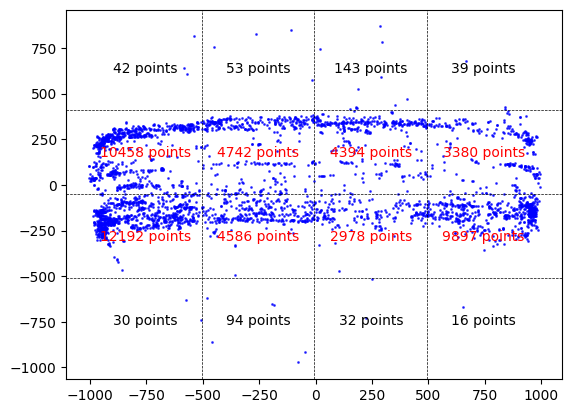

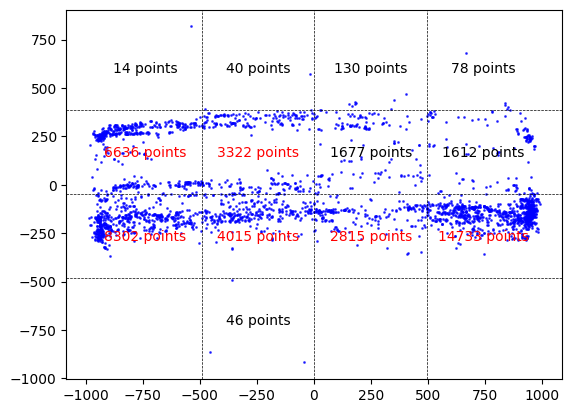

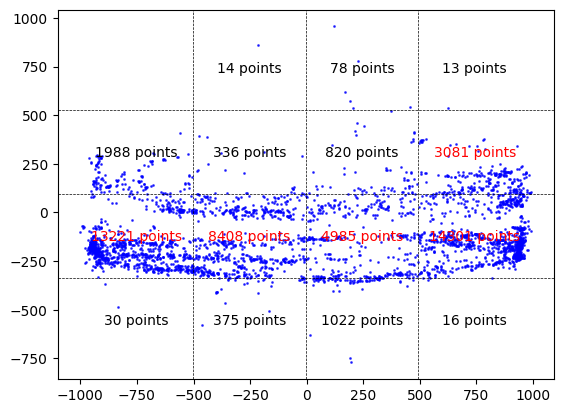

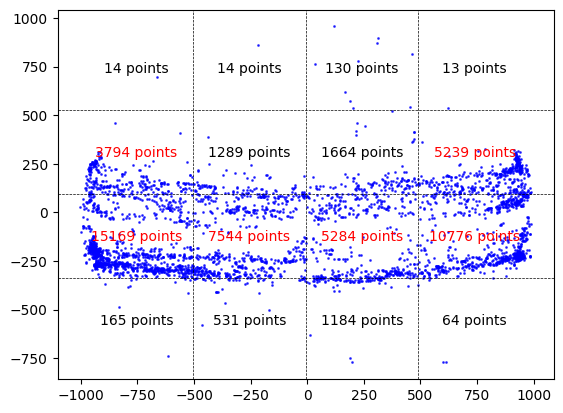

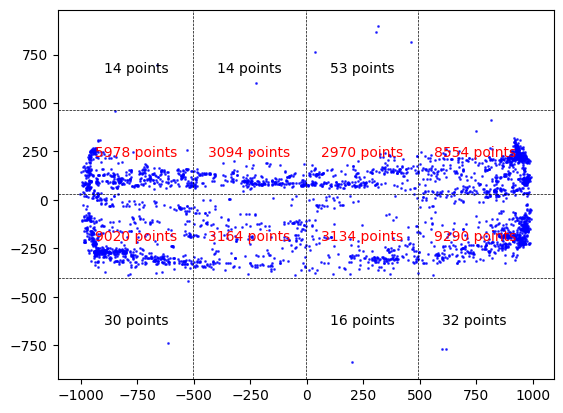

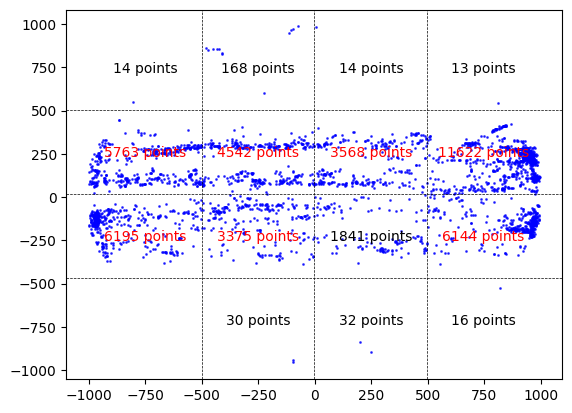

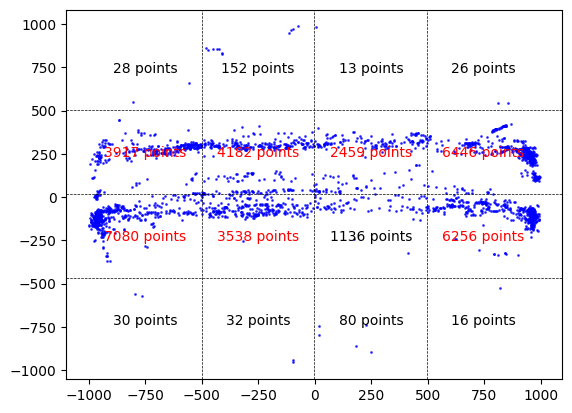

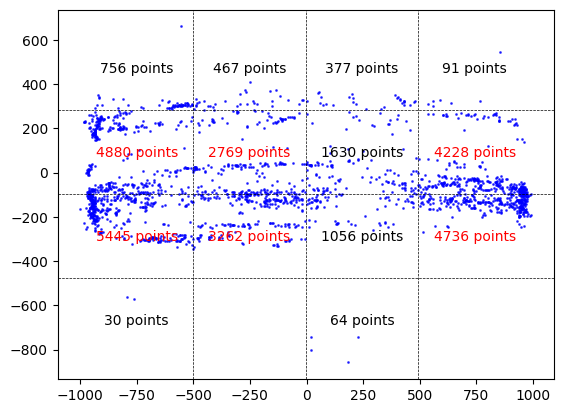

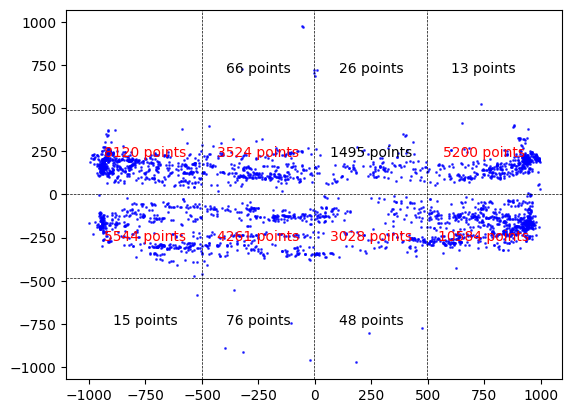

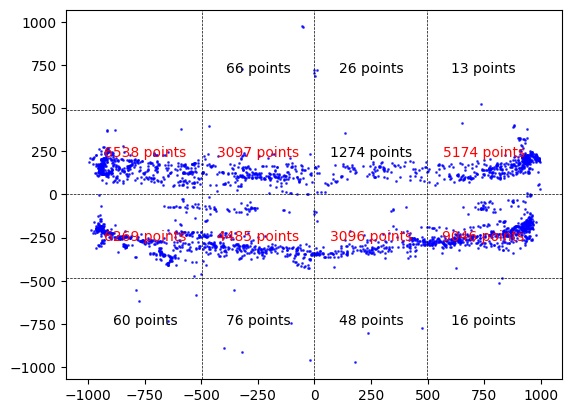

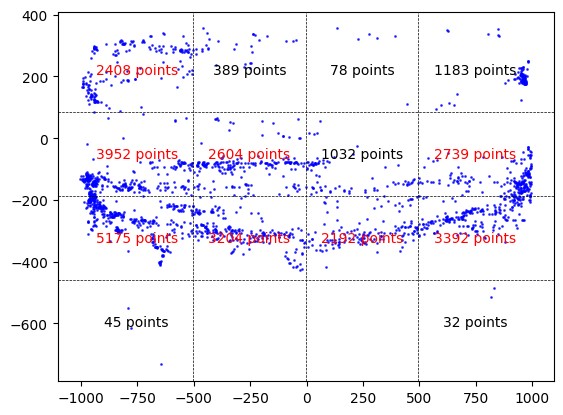

In [54]:
import matplotlib.pyplot as plt
import numpy as np
for lastbatch in geodataframes:
    # Assuming x_list and y_list are your x and y coordinates
    x_list = lastbatch['x.pos.asec']
    y_list = lastbatch['y.pos.asec']

    # Define boundaries for quadrants
    x_mid = np.median(x_list)
    y_mid = np.median(y_list)

    # Assign each point to a quadrant
    quadrant = np.zeros(len(x_list))
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 1  # Quadrant I
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 2  # Quadrant II
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 3  # Quadrant III
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 4  # Quadrant IV

    # Additional quadrants
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 5  # Quadrant V
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 6  # Quadrant VI
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 7  # Quadrant VII
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 8  # Quadrant VIII

    # Additional quadrants
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 9  # Quadrant IX
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 10  # Quadrant X
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 11  # Quadrant XI
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 12  # Quadrant XII

    # Additional quadrants
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 13  # Quadrant XIII
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 14  # Quadrant XIV
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 15  # Quadrant XV
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 16  # Quadrant XVI

    # Create a 2D histogram to get the count in each quadrant
    hist, x_edges, y_edges = np.histogram2d(x_list, y_list, bins=[4, 4], range=[[min(x_list), max(x_list)], [min(y_list), max(y_list)]], weights=quadrant)

    # Define a threshold
    threshold = 2000

    # Create a mask for quadrants with data
    data_mask = hist > 0

    # Plot the scatter plot with different colors for each quadrant
    scatter = plt.scatter(x_list, y_list, c='blue', alpha=0.7, s=1)

    # Draw grid lines to represent quadrant borders
    for i in range(1, 4):
        plt.axvline(x=x_edges[i], color='black', linestyle='--', linewidth=0.5)
    for j in range(1, 4):
        plt.axhline(y=y_edges[j], color='black', linestyle='--', linewidth=0.5)

    # Annotate counts in each quadrant
    for i in range(4):
        for j in range(4):
            if hist[i, j] > threshold:
                color = 'red'
            else:
                color = 'black' if data_mask[i, j] else 'white'
            plt.annotate(f'{int(hist[i, j])} points', xy=(x_edges[i] + 0.5 * (x_edges[i + 1] - x_edges[i]), y_edges[j] + 0.5 * (y_edges[j + 1] - y_edges[j])), ha='center', va='center', color=color)

    plt.show()



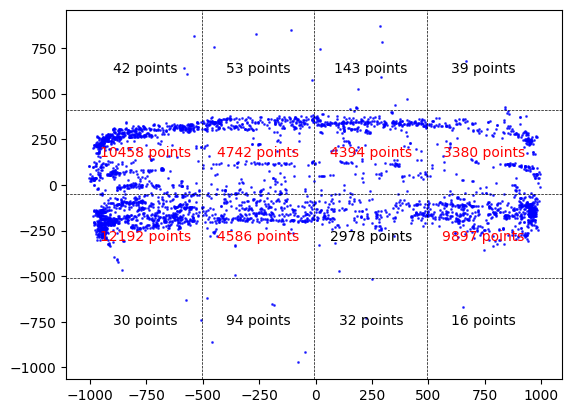

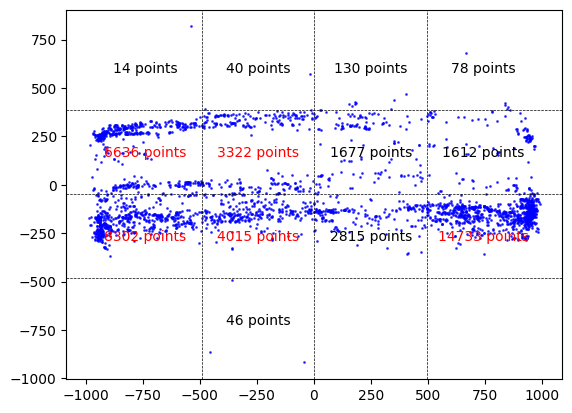

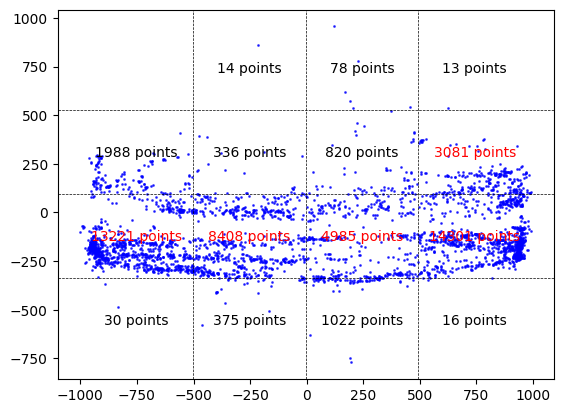

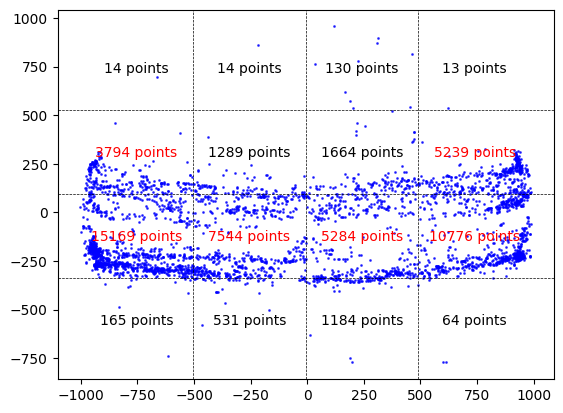

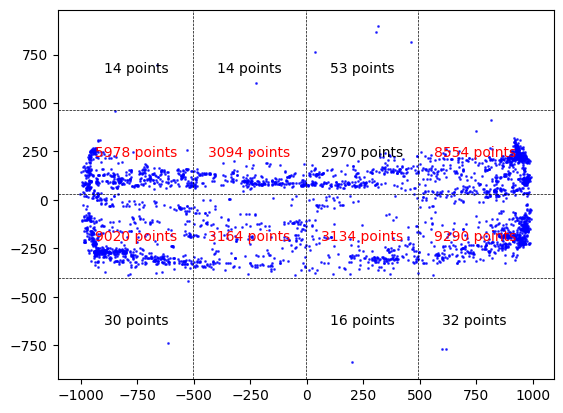

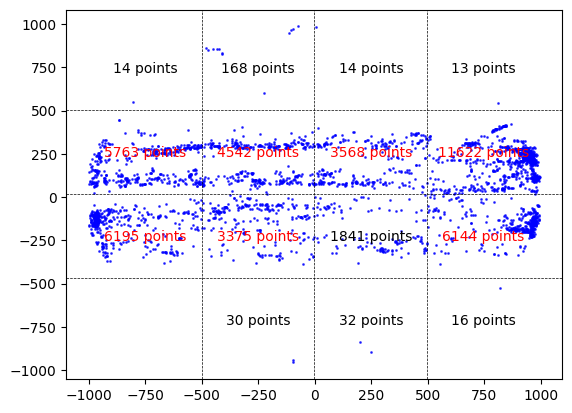

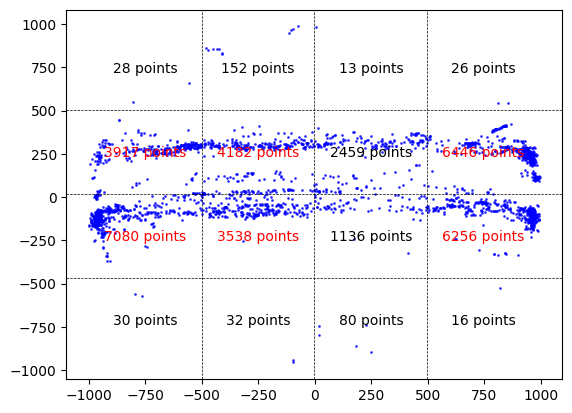

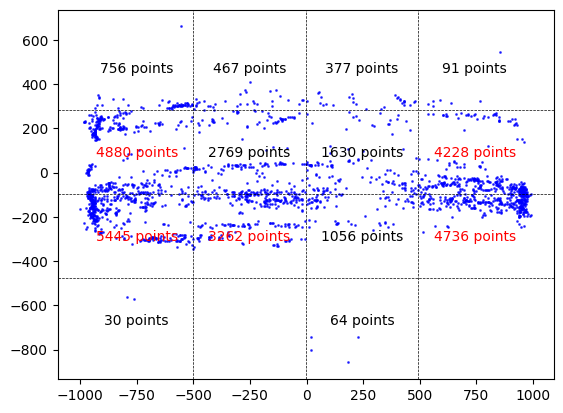

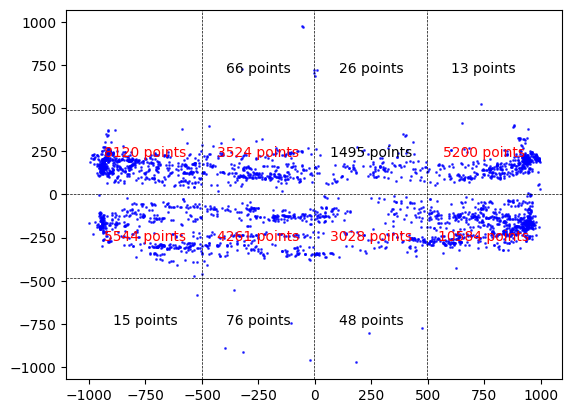

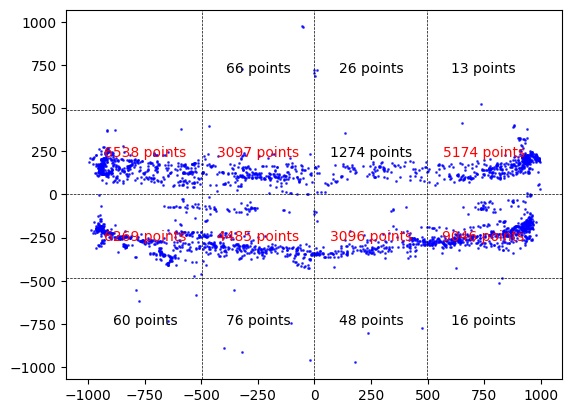

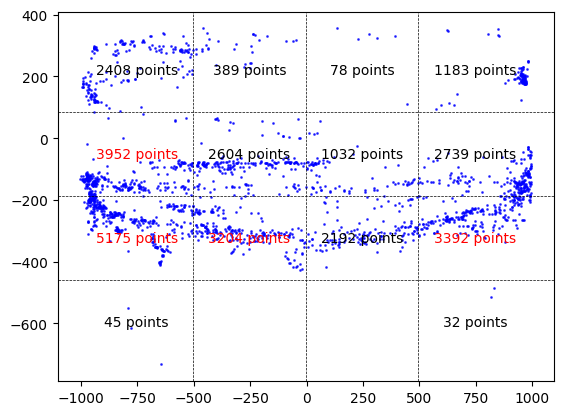

In [50]:
import matplotlib.pyplot as plt
import numpy as np

for lastbatch in geodataframes:
    # Assuming x_list and y_list are your x and y coordinates
    x_list = lastbatch['x.pos.asec']
    y_list = lastbatch['y.pos.asec']

    # Define boundaries for quadrants
    x_mid = np.median(x_list)
    y_mid = np.median(y_list)

    # Assign each point to a quadrant
    quadrant = np.zeros(len(x_list))
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 1  # Quadrant I
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 2  # Quadrant II
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 3  # Quadrant III
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 4  # Quadrant IV

    # Additional quadrants
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 5  # Quadrant V
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 6  # Quadrant VI
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 7  # Quadrant VII
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 8  # Quadrant VIII

    # Additional quadrants
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 9  # Quadrant IX
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 10  # Quadrant X
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 11  # Quadrant XI
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 12  # Quadrant XII

    # Additional quadrants
    quadrant[(x_list > x_mid) & (y_list > y_mid)] = 13  # Quadrant XIII
    quadrant[(x_list < x_mid) & (y_list > y_mid)] = 14  # Quadrant XIV
    quadrant[(x_list < x_mid) & (y_list < y_mid)] = 15  # Quadrant XV
    quadrant[(x_list > x_mid) & (y_list < y_mid)] = 16  # Quadrant XVI

    # Create a 2D histogram to get the count in each quadrant
    hist, x_edges, y_edges = np.histogram2d(x_list, y_list, bins=[4, 4], range=[[min(x_list), max(x_list)], [min(y_list), max(y_list)]], weights=quadrant)

    # Define a threshold
    threshold = 3000

    # Create a mask for quadrants with data
    data_mask = hist > 0

    # Plot the scatter plot with different colors for each quadrant
    scatter = plt.scatter(x_list, y_list, c='blue', alpha=0.7, s=1)

    # Draw grid lines to represent quadrant borders
    for i in range(1, 4):
        plt.axvline(x=x_edges[i], color='black', linestyle='--', linewidth=0.5)
    for j in range(1, 4):
        plt.axhline(y=y_edges[j], color='black', linestyle='--', linewidth=0.5)

    # Annotate counts in each quadrant
    for i in range(4):
        for j in range(4):
            if hist[i, j] > threshold:
                color = 'red'
            else:
                color = 'black' if data_mask[i, j] else 'white'
            plt.annotate(f'{int(hist[i, j])} points', xy=(x_edges[i] + 0.5 * (x_edges[i + 1] - x_edges[i]), y_edges[j] + 0.5 * (y_edges[j + 1] - y_edges[j])), ha='center', va='center', color=color)

    plt.show()
